The Sun Also Rises (1926)
http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-h.html

Men Without Women (1927) 
http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-h.html

Winner Take Nothing (1933)
http://gutenberg.ca/ebooks/hemingwaye-winnertakenothing/hemingwaye-winnertakenothing-00-h.html

Green Hills of Africa (1935)
http://gutenberg.ca/ebooks/hemingwaye-greenhillsofafrica/hemingwaye-greenhillsofafrica-00-h.html

Across the River and Into the Trees (1950) 
http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-h.html

The Old Man and the Sea (1952)
http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-h.html

In [1]:
# Web Scraping
import requests
from bs4 import BeautifulSoup

# Preprocess
import spacy
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd

# EDA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/koalachelsea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/koalachelsea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Web Scraping using BeautifulSoup

In [2]:
url = 'http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-h.html'
res = requests.get(url)
html_page = res.content

soup = BeautifulSoup(html_page, 'html.parser')

text = soup.find_all(text=True)

set([t.parent.name for t in text])

{'[document]',
 'a',
 'b',
 'blockquote',
 'body',
 'div',
 'h1',
 'h2',
 'h3',
 'h4',
 'head',
 'html',
 'i',
 'p',
 'small',
 'title'}

In [3]:
output = ''
for t in text:
    if t.parent.name in ['p']:
        output += '{} '.format(t)
#output

In [4]:
def Web_Scraping(url):
    res = requests.get(url)
    html_page = res.content
    soup = BeautifulSoup(html_page, 'html.parser')
    text = soup.find_all(text=True)
    output = ''
    for t in text:
        if t.parent.name in ['p']:
            output += '{} '.format(t)
    output = output.strip().replace("\n", " ").replace("\r", " ").replace("\r\n", " ").replace("  ", " ")
    return output

In [5]:
url_1 = "http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-h.html"
book_1 = Web_Scraping(url_1)
url_2 = "http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-h.html"
book_2 = Web_Scraping(url_2)
url_3 = "http://gutenberg.ca/ebooks/hemingwaye-winnertakenothing/hemingwaye-winnertakenothing-00-h.html"
book_3 = Web_Scraping(url_3)
url_4 = "http://gutenberg.ca/ebooks/hemingwaye-greenhillsofafrica/hemingwaye-greenhillsofafrica-00-h.html"
book_4 = Web_Scraping(url_4)
url_5 = "http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-h.html"
book_5 = Web_Scraping(url_5)
url_6 = "http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-h.html"
book_6 = Web_Scraping(url_6)

# Text Preprocessing

## Ideas
- Number of distinct words (vocabulary)
- Lexical diversity = vocabulary/token ratio
- Distribution of word lengths
- Most frequent words
- Number of n-gram word (bigrams, trigrams, 4-grams, etc.)
- Usage of passive and active voice
- Usage of parts of speech (nouns, verb, adverbs, adjectives, etc.)
- Sentiment (positive, negative)

## Book Level

In [6]:
all_books = {'book': ['book_1','book_2','book_3','book_4','book_5', 'book_6'],
             'text': [book_1, book_2, book_3, book_4, book_5, book_6]}

all_books = pd.DataFrame(all_books, columns = ['book', 'text'])
all_books

,book,text
0,book_1,Robert Cohn was once middleweight boxing champ...
1,book_2,Manuel Garcia climbed the stairs to Don Miguel...
2,book_3,"It wasn't about anything, something about maki..."
3,book_4,IN OUR TIME FIESTA MEN WITHOUT WOMEN A FAREWEL...
4,book_5,ERNEST HEMINGWAY READERS UNION — JONATHAN ...
5,book_6,"ERNEST HEMINGWAY CHARLES SCRIBNER'S SONS, NE..."


In [7]:
# Counting Vocabulary
all_books['token'] = all_books['text'].apply(word_tokenize)\
.apply(lambda x: [item for item in x if item.isalpha()])

all_books['token count'] = all_books['token'].apply(len)
all_books['vocab count'] = all_books['token'].apply(set).apply(len)
all_books['lexical_diversity'] = all_books['vocab count']/all_books['token count']

In [8]:
sid = SentimentIntensityAnalyzer()
all_books['scores sentiment'] = all_books['text'].apply(lambda x: sid.polarity_scores(x))
all_books

,book,text,token,token count,vocab count,lexical_diversity,scores sentiment
0,book_1,Robert Cohn was once middleweight boxing champ...,"[Robert, Cohn, was, once, middleweight, boxing...",66651,4990,0.074868,"{'neg': 0.06, 'neu': 0.835, 'pos': 0.105, 'com..."
1,book_2,Manuel Garcia climbed the stairs to Don Miguel...,"[Manuel, Garcia, climbed, the, stairs, to, Don...",40027,3532,0.088240,"{'neg': 0.058, 'neu': 0.858, 'pos': 0.084, 'co..."
2,book_3,"It wasn't about anything, something about maki...","[It, was, about, anything, something, about, m...",38212,4151,0.108631,"{'neg': 0.089, 'neu': 0.823, 'pos': 0.088, 'co..."
3,book_4,IN OUR TIME FIESTA MEN WITHOUT WOMEN A FAREWEL...,"[IN, OUR, TIME, FIESTA, MEN, WITHOUT, WOMEN, A...",67260,5216,0.077550,"{'neg': 0.085, 'neu': 0.816, 'pos': 0.099, 'co..."
4,book_5,ERNEST HEMINGWAY READERS UNION — JONATHAN ...,"[ERNEST, HEMINGWAY, READERS, UNION, JONATHAN, ...",64263,5770,0.089787,"{'neg': 0.08, 'neu': 0.782, 'pos': 0.138, 'com..."
5,book_6,"ERNEST HEMINGWAY CHARLES SCRIBNER'S SONS, NE...","[ERNEST, HEMINGWAY, CHARLES, SCRIBNER, SONS, N...",26561,2634,0.099168,"{'neg': 0.07, 'neu': 0.82, 'pos': 0.111, 'comp..."


## Sentence Level

In [9]:
def get_sents(book):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(book)
    sent_list = []
    for sent in doc.sents:
        sent_list.append(sent.text)
    return sent_list

In [10]:
sents_1 = get_sents(book_1)
df_1 = {'sentence': sents_1,
        'book': 'Book_1'}
df_1 = pd.DataFrame(df_1, columns = ['sentence', 'book'])
len(sents_1)

8622

In [11]:
sents_2 = get_sents(book_2)
df_2 = {'sentence': sents_2,
        'book': 'Book_2'}
df_2 = pd.DataFrame(df_2, columns = ['sentence', 'book'])
len(sents_2)

4808

In [12]:
sents_3 = get_sents(book_3)
df_3 = {'sentence': sents_3,
        'book': 'Book_3'}
df_3 = pd.DataFrame(df_3, columns = ['sentence', 'book'])
len(sents_3)

4514

In [13]:
sents_4 = get_sents(book_4)
df_4 = {'sentence': sents_4,
        'book': 'Book_4'}
df_4 = pd.DataFrame(df_4, columns = ['sentence', 'book'])
len(sents_4)

5678

In [14]:
sents_5 = get_sents(book_5)
df_5 = {'sentence': sents_5,
        'book': 'Book_5'}
df_5 = pd.DataFrame(df_5, columns = ['sentence', 'book'])
len(sents_5)

6783

In [15]:
sents_6 = get_sents(book_6)
df_6 = {'sentence': sents_6,
        'book': 'Book_6'}
df_6 = pd.DataFrame(df_6, columns = ['sentence', 'book'])
len(sents_6)

2109

In [16]:
df_all = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6]).reset_index(drop=True)
df_all.head(10)

,sentence,book
0,Robert Cohn was once middleweight boxing champ...,Book_1
1,Do not think that I am very much impressed by ...,Book_1
2,"He cared nothing for boxing, in fact he dislik...",Book_1
3,There was a certain inner comfort in knowing h...,Book_1
4,He was Spider Kelly's star pupil.,Book_1
5,Spider Kelly taught all his young gentlemen to...,Book_1
6,But it seemed to fit Cohn.,Book_1
7,He was really very fast.,Book_1
8,He was so good that Spider promptly overmatche...,Book_1
9,"This increased Cohn's distaste for boxing, but...",Book_1


In [17]:
len(sents_1)+len(sents_2)+len(sents_3)+len(sents_4)+len(sents_5)+len(sents_6)

32514

In [18]:
df_all['token'] = df_all['sentence'].apply(word_tokenize)\
.apply(lambda x: [item for item in x if item.isalpha()])

# after remove stopwords and stemmer
stop = stopwords.words('english')
porter_stemmer = PorterStemmer()
df_all['clean token'] = df_all['token'].apply(lambda x: [item for item in x if item not in stop_words])\
.apply(lambda x: [porter_stemmer.stem(item) for item in x])
df_all.head(15)

,sentence,book,token,clean token
0,Robert Cohn was once middleweight boxing champ...,Book_1,"[Robert, Cohn, was, once, middleweight, boxing...","[robert, cohn, middleweight, box, champion, pr..."
1,Do not think that I am very much impressed by ...,Book_1,"[Do, not, think, that, I, am, very, much, impr...","[Do, think, I, much, impress, box, titl, meant..."
2,"He cared nothing for boxing, in fact he dislik...",Book_1,"[He, cared, nothing, for, boxing, in, fact, he...","[He, care, noth, box, fact, dislik, learn, pai..."
3,There was a certain inner comfort in knowing h...,Book_1,"[There, was, a, certain, inner, comfort, in, k...","[there, certain, inner, comfort, know, could, ..."
4,He was Spider Kelly's star pupil.,Book_1,"[He, was, Spider, Kelly, star, pupil]","[He, spider, kelli, star, pupil]"
5,Spider Kelly taught all his young gentlemen to...,Book_1,"[Spider, Kelly, taught, all, his, young, gentl...","[spider, kelli, taught, young, gentlemen, box,..."
6,But it seemed to fit Cohn.,Book_1,"[But, it, seemed, to, fit, Cohn]","[but, seem, fit, cohn]"
7,He was really very fast.,Book_1,"[He, was, really, very, fast]","[He, realli, fast]"
8,He was so good that Spider promptly overmatche...,Book_1,"[He, was, so, good, that, Spider, promptly, ov...","[He, good, spider, promptli, overmatch, got, n..."
9,"This increased Cohn's distaste for boxing, but...",Book_1,"[This, increased, Cohn, distaste, for, boxing,...","[thi, increas, cohn, distast, box, gave, certa..."


# Advanced Methods

In [19]:
# The default regexp select tokens of 2 or more alphanumeric characters 
# And punctuation is completely ignored and always treated as a token separator
# Use unigrams 
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(df_all.sentence)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)

(32514, 11934)


In [20]:
# for reproducibility
random_state = 666
cls = MiniBatchKMeans(n_clusters=6, random_state=random_state)
cls.fit(X_tfidf)
cls.predict(X_tfidf)

array([3, 4, 3, ..., 3, 3, 3], dtype=int32)

In [21]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X_tfidf.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

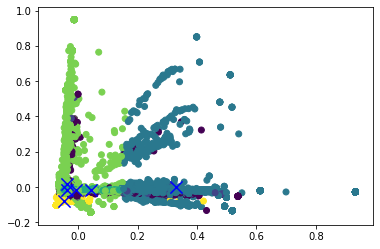

In [22]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(X_tfidf))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [23]:
reduced_cluster_centers

array([[-0.00651325, -0.01857756],
       [ 0.04352401, -0.01766478],
       [ 0.32995565,  0.00085598],
       [-0.0389861 , -0.0145092 ],
       [-0.03758645,  0.01590229],
       [-0.0481844 , -0.07749696]])

In [24]:
# Evalauation with labelled dataset
homogeneity_score(df_all.book, cls.predict(X_tfidf))

0.0018017533534770147

In [25]:
# The best value is 1 and the worst value is -1. 
# Values near 0 indicate overlapping clusters. 
silhouette_score(X_tfidf, labels=cls.predict(X_tfidf))

0.028233007859249763

In [26]:
words = count_vect.get_feature_names()
# setup kmeans clustering
kmeans = KMeans(n_clusters = 10, n_init = 20, n_jobs = -1, tol = 0.01, max_iter = 200)
# fit the data 
kmeans.fit(X_tfidf)
# this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-10:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : good, like, did, right, ll, thought, come, time, came
1 : say, did, said, things, didn, don, brett, does, good
2 : bull, fighter, manuel, ring, fight, fighters, cape, muleta, romero
3 : went, door, room, stairs, came, table, road, car, street
4 : make, difference, money, doesn, sure, good, did, don, feel
5 : man, old, said, good, fish, looked, poor, boy, thought
6 : asked, girl, brett, colonel, pop, mike, manuel, cohn, hogan
7 : don, know, said, think, want, like, care, talk, worry
8 : said, colonel, pop, brett, good, right, ll, mike, girl
9 : yes, said, oh, colonel, sir, agreed, god, says, jack


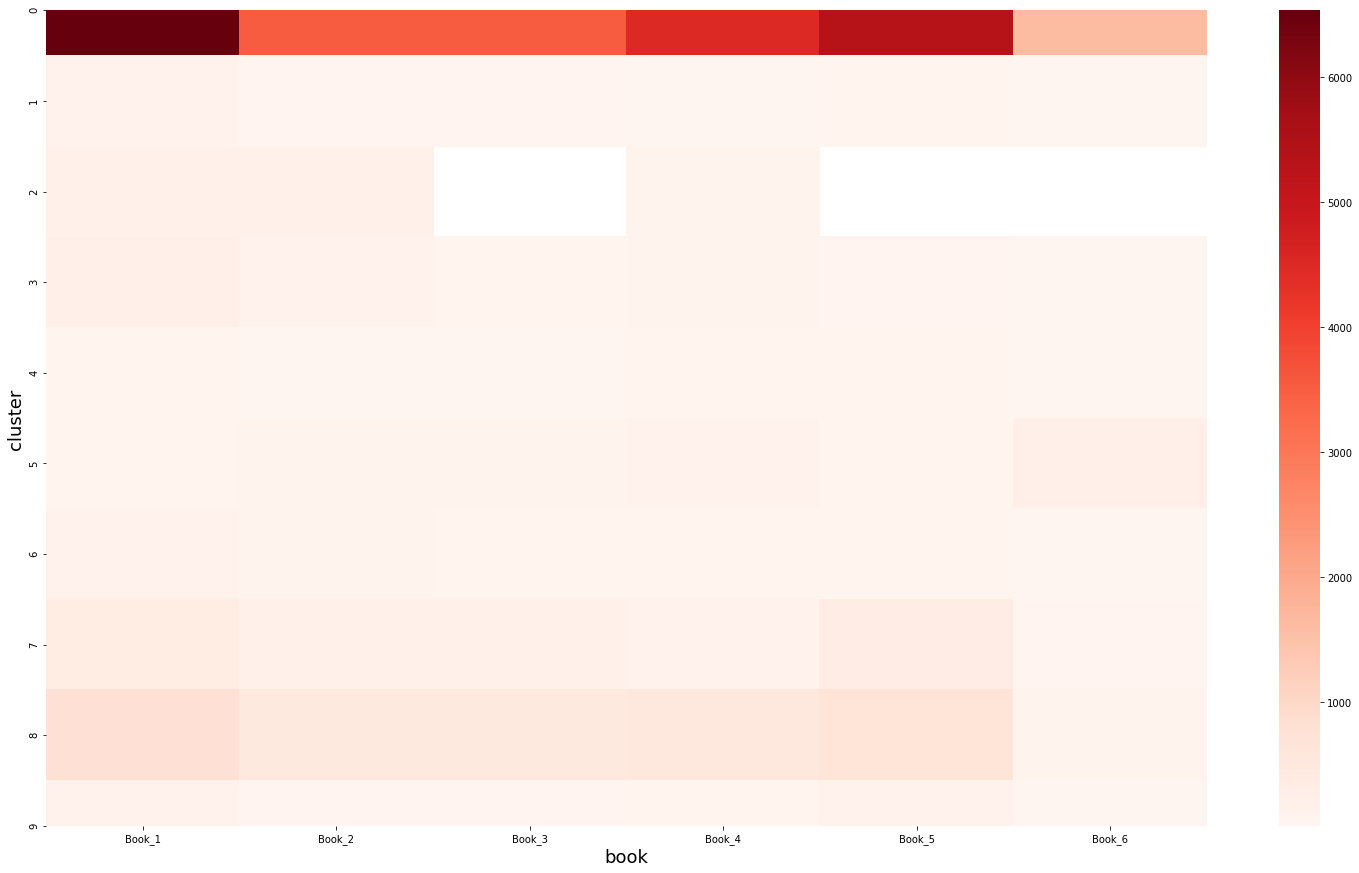

In [27]:
#add the cluster label to the data frame
df_all['cluster'] = kmeans.labels_
clusters = df_all.groupby(['cluster', 'book']).size()
fig, ax1 = plt.subplots(figsize = (26, 15))
sns.heatmap(clusters.unstack(level = 'book'), ax = ax1, cmap = 'Reds')
ax1.set_xlabel('book').set_size(18)
ax1.set_ylabel('cluster').set_size(18)